In [1]:
__author__ = 'Elliot I. Simon'
__email__ = 'ellsim@dtu.dk'
__version__ = 'August 17, 2021'

In [ ]:
'''
The purpose of this script is to 
'''

In [2]:
import numpy as np
import pandas as pd
import utm
from matplotlib import pyplot as plt
import datetime
import os
import glob
import xarray as xr
import scipy as sp
from netCDF4 import Dataset
from netCDF4 import MFDataset

In [3]:
#%matplotlib inline
%matplotlib notebook

In [4]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
plt.rcParams['figure.figsize'] = [15, 10]

In [5]:
def get_angles(ref, target):
    '''Calculate bearing (azimuth and elevation) and pythagorean distance between reference and target'''
    az = (np.rad2deg(np.arctan2((target[0] - ref[0]), (target[1] - ref[1]))) + 360) % 360
    el = np.rad2deg(np.arctan((target[2]-ref[2])/(np.sqrt((target[0]-ref[0])**2+(target[1]-ref[1])**2))))    
    ranges = np.linalg.norm(np.array(ref) - np.array(target))
    print('Azimuth, Elevation, Range')
    return az, el, ranges

In [6]:
# Get list of files
filenames=[]
position = 'Globe7_NO-08'
path = r"M:\Documents\GloBE\Azimuth_alignment_turbines\Azimuth_orientation_PPI\Globe7\*.nc"
for file in glob.glob(path):
    filenames.append(file)
print(filenames)

['M:\\Documents\\GloBE\\Azimuth_alignment_turbines\\Azimuth_orientation_PPI\\Globe7\\Globe7_WCS000231_2021-08-17_15-48-55_ppi_1034_150m.nc']


In [7]:
# Process all data
for f in filenames:
    #print(f)
    
    # Get sweep id from metadata
    rootgrp = Dataset(f, "r", format="NETCDF4")
    group = list(rootgrp.groups.keys())[-1]
    # Open netcdf file inside specific sweep group
    alldata = xr.open_dataset(f, group=group, decode_times=False)
    # Make export path
    outpath = path.split('*')[0]

In [8]:
alldata[['timestamp', 'azimuth', 'elevation', 'cnr', 'radial_wind_speed', 'radial_wind_speed_ci']]

<xarray.Dataset>
Dimensions:               (range: 159, time: 360)
Coordinates:
  * time                  (time) float64 1.629e+09 1.629e+09 ... 1.629e+09
  * range                 (range) int32 400 440 480 520 ... 6600 6640 6680 6720
Data variables:
    timestamp             (time) object ...
    azimuth               (time) float64 ...
    elevation             (time) float64 ...
    cnr                   (time, range) float64 ...
    radial_wind_speed     (time, range) float64 ...
    radial_wind_speed_ci  (time, range) float64 ...
Attributes:
    scan_file_name:      PPI
    scan_id:             1034
    settings_file_name:  default320
    settings_id:         17
    res_file_name:       150m
    res_id:              94

<IPython.core.display.Javascript object>


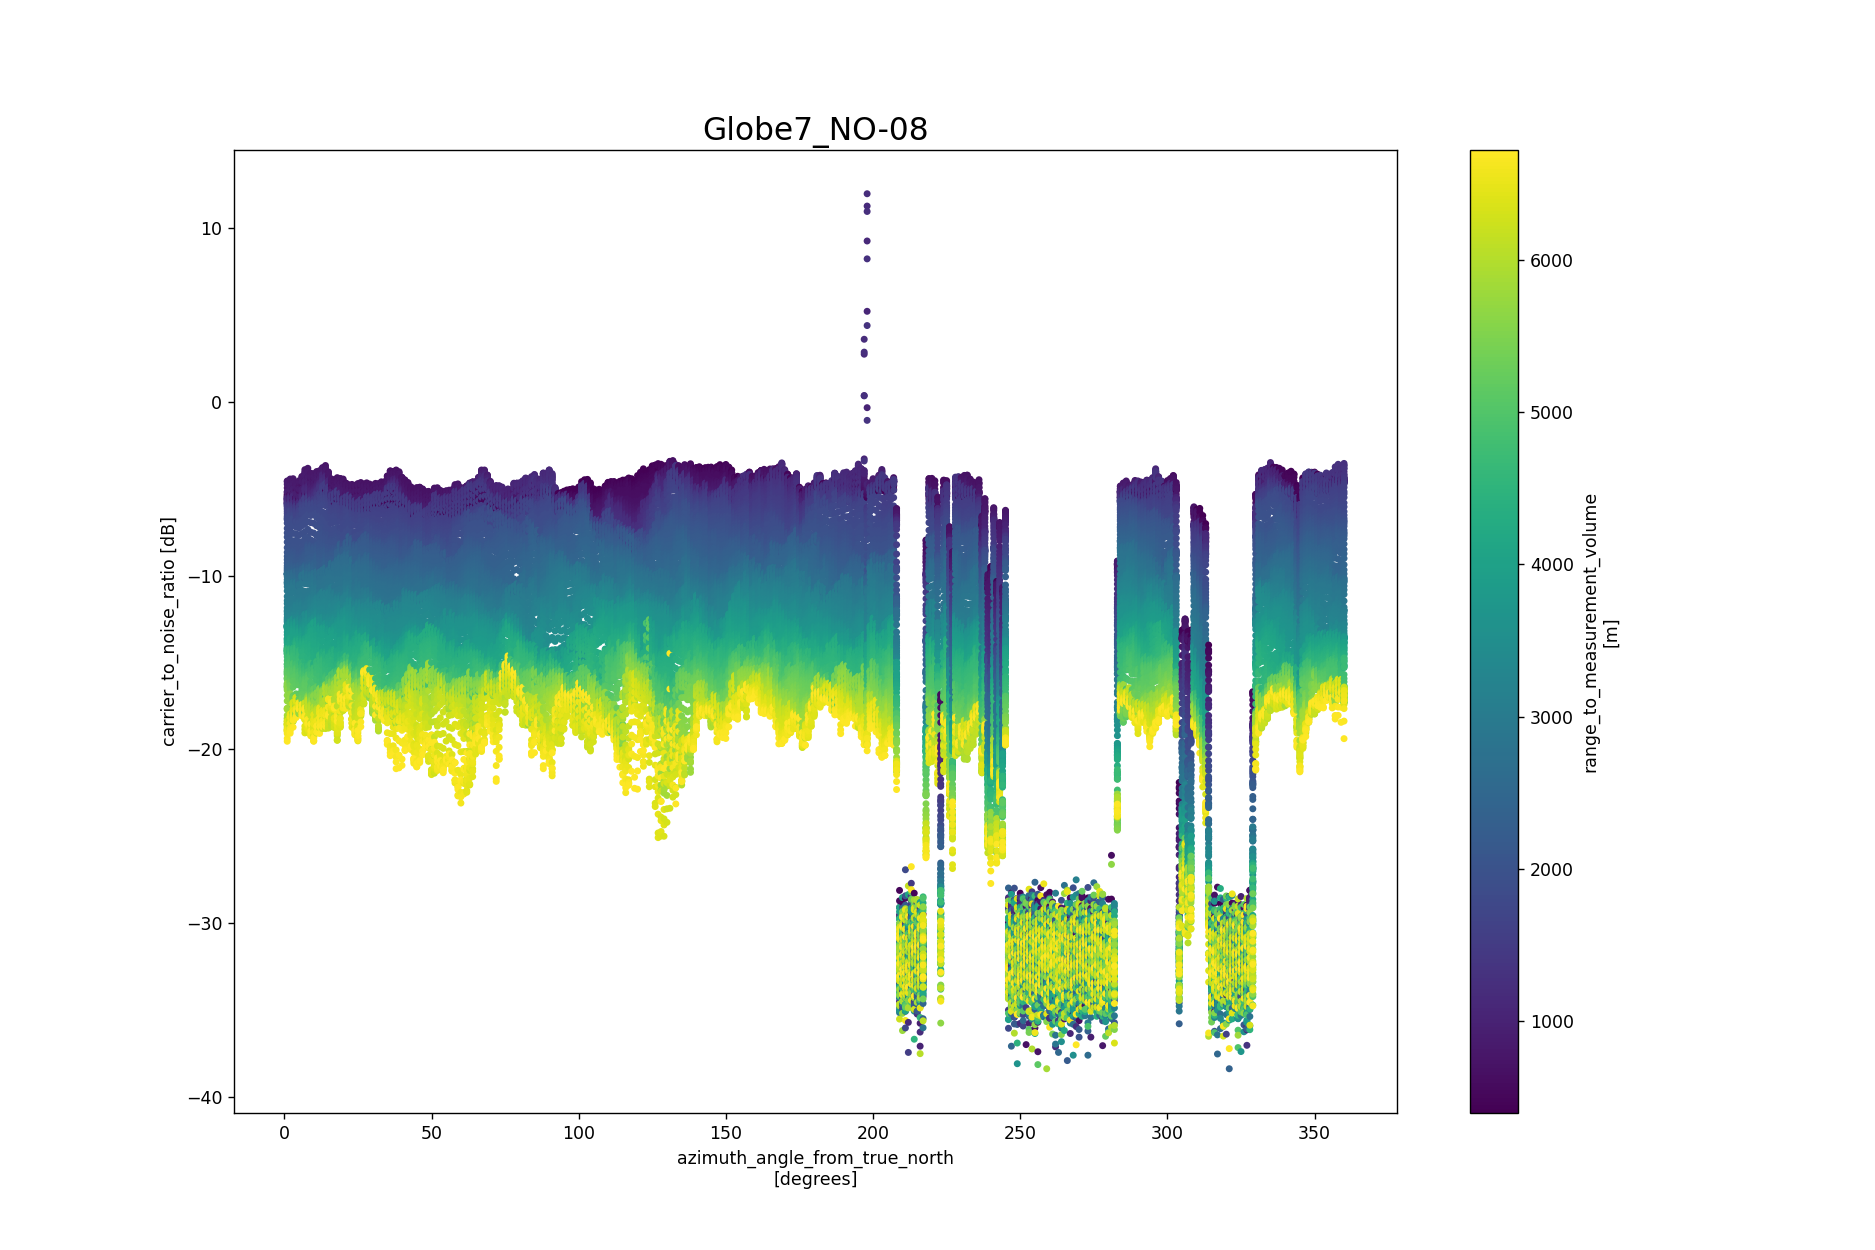

In [9]:
# Plot CNR against Azimuth angle, colored by range

alldata.plot.scatter('azimuth', 'cnr', hue='range', marker='.')
plt.title(str(position), fontsize=18)
plt.savefig('./' + str(position) + '.png', dpi=150)

In [ ]:
# Turbine coordinates

ARB001 = [412075.87,6044324.27,87.54]
ARB002 = [412905.31,6044308.72,87.54]
ARB003 = [413735.97,6044293.03,87.54]
ARB004 = [414538.63,6044277.98,87.54]
ARB005 = [415341.15,6044262.62,87.54]
ARB006 = [416143.18,6044248.06,87.54]
ARB007 = [416945.59,6044233.26,87.54]
ARB008 = [417748.63,6044218.68,87.54]
ARB009 = [418550.31,6044204.05,87.54]
ARB010 = [419352.22,6044189.77,87.54]
ARB011 = [420155.21,6044175.43,87.54]
ARB012 = [420959.57,6044161.34,87.54]
ARB013 = [412064.60,6043723.72,87.54]
ARB014 = [412894.29,6043706.80,87.54]
ARB015 = [413724.26,6043691.69,87.54]
ARB016 = [414526.99,6043676.16,87.54]
ARB017 = [415329.43,6043660.93,87.54]
ARB018 = [416132.17,6043646.55,87.54]
ARB019 = [416934.48,6043630.84,87.54]
ARB020 = [417737.61,6043616.84,87.54]
ARB021 = [418539.41,6043602.65,87.54]
ARB022 = [419341.46,6043588.38,87.54]
ARB023 = [420144.30,6043574.15,87.54]
ARB024 = [420948.34,6043560.11,87.54]
ARB025 = [412053.12,6043121.54,87.54]
ARB026 = [412882.54,6043105.63,87.54]
ARB027 = [413712.75,6043089.31,87.54]
ARB028 = [414515.62,6043074.78,87.54]
ARB029 = [415318.53,6043059.43,87.54]
ARB030 = [416121.15,6043044.62,87.54]
ARB031 = [416924.01,6043030.28,87.54]
ARB032 = [417726.94,6043015.48,87.54]
ARB033 = [418529.08,6043001.00,87.54]
ARB034 = [419331.11,6042987.06,87.54]
ARB035 = [420133.63,6042972.61,87.54]
ARB036 = [420938.45,6042958.24,87.54]
ARB037 = [412041.62,6042523.92,87.54]
ARB038 = [412871.07,6042508.28,87.54]
ARB039 = [413701.64,6042492.35,87.54]
ARB040 = [414503.47,6042476.46,87.54]
ARB041 = [415307.36,6042462.37,87.54]
ARB042 = [416110.11,6042446.76,87.54]
ARB043 = [416913.38,6042432.55,87.54]
ARB044 = [417716.18,6042418.10,87.54]
ARB045 = [418517.84,6042403.61,87.54]
ARB046 = [419320.11,6042389.27,87.54]
ARB047 = [420123.18,6042374.90,87.54]
ARB048 = [412029.54,6041914.44,87.54]
ARB049 = [412859.16,6041898.74,87.54]
ARB050 = [413689.87,6041883.04,87.54]
ARB051 = [414492.98,6041867.51,87.54]
ARB052 = [415295.84,6041852.44,87.54]
ARB053 = [416099.05,6041837.49,87.54]
ARB054 = [416901.91,6041823.21,87.54]
ARB055 = [417705.06,6041808.12,87.54]
ARB056 = [418507.23,6041793.68,87.54]
ARB057 = [419309.74,6041779.48,87.54]
ARB058 = [420112.38,6041765.25,87.54]
ARB059 = [412018.30,6041316.70,87.54]
ARB060 = [412847.91,6041300.89,87.54]
ARB061 = [413678.49,6041285.39,87.54]
ARB062 = [414482.08,6041270.17,87.54]
ARB063 = [415285.00,6041255.39,87.54]
ARB064 = [416087.71,6041240.11,87.54]
ARB065 = [416890.95,6041225.82,87.54]
ARB066 = [417694.27,6041210.96,87.54]
ARB067 = [418496.44,6041196.06,87.54]
ARB068 = [419298.93,6041181.97,87.54]
ARB069 = [420101.97,6041168.00,87.54]
ARB070 = [412006.36,6040714.52,87.54]
ARB071 = [412836.73,6040698.56,87.54]
ARB072 = [413667.61,6040682.49,87.54]
ARB073 = [414470.67,6040667.41,87.54]
ARB074 = [415273.42,6040651.79,87.54]
ARB075 = [416077.23,6040637.30,87.54]
ARB076 = [416879.82,6040622.93,87.54]
ARB077 = [417683.06,6040608.27,87.54]
ARB078 = [418485.55,6040593.74,87.54]
ARB079 = [419288.33,6040579.64,87.54]
ARB080 = [420091.77,6040565.04,87.54]

NSORE001 = [411900.00,6036760.00,95.04]
NSORE002 = [412814.00,6036760.00,95.04]
NSORE003 = [413728.00,6036761.00,95.04]
NSORE004 = [414642.00,6036762.00,95.04]
NSORE005 = [415556.00,6036762.00,95.04]
NSORE006 = [416470.00,6036763.00,95.04]
NSOLM007 = [417371.00,6036164.00,95.04]
NSORE008 = [418293.00,6036764.00,95.04]
NSORE009 = [411887.00,6036160.00,95.04]
NSORE010 = [411874.00,6035560.00,95.04]
NSOLM011 = [412788.00,6035561.00,95.04]
NSORE012 = [413702.00,6035561.00,95.04]
NSOLM013 = [414616.00,6035563.00,95.04]
NSOLM014 = [415530.00,6035564.00,95.04]
NSOLM015 = [416444.00,6035563.00,95.04]
NSOLM016 = [417345.00,6034964.00,95.04]
NSORE017 = [418271.00,6035565.00,95.04]
NSORE018 = [411862.00,6034960.00,95.04]
NSORE019 = [411848.00,6034360.00,95.04]
NSOLM020 = [412763.00,6034361.00,95.04]
NSOLM021 = [413676.00,6034362.00,95.04]
NSOLM022 = [414590.00,6034362.00,95.04]
NSOLM023 = [415504.00,6034363.00,95.04]
NSOLM024 = [416418.00,6034364.00,95.04]
NSOLM025 = [417319.00,6033765.00,95.04]
NSORE026 = [411835.00,6033761.00,95.04]
NSORE027 = [411823.00,6033161.00,95.04]
NSOLM028 = [412736.00,6033162.00,95.04]
NSOLM029 = [413650.00,6033162.00,95.04]
NSOLM030 = [414564.00,6033163.00,95.04]
NSOLM031 = [415465.00,6032564.00,95.04]
NSOLM032 = [416392.00,6033164.00,95.04]
NSOLM033 = [417293.00,6032565.00,95.04]
NSORE034 = [411810.00,6032561.00,95.04]
NSORE035 = [411797.00,6031961.00,95.04]
NSOLM036 = [412710.00,6031962.00,95.04]
NSOLM037 = [413624.00,6031963.00,95.04]
NSOLM038 = [414538.00,6031963.00,95.04]
NSORE039 = [415439.00,6031364.00,95.04]
NSOLM040 = [416366.00,6031965.00,95.04]
NSORE041 = [411784.00,6031362.00,95.04]
NSORE042 = [411771.00,6030762.00,95.04]
NSOLM043 = [412684.00,6030762.00,95.04]
NSORE044 = [413585.00,6030153.00,95.04]
NSORE045 = [414512.00,6030764.00,95.04]
NSORE046 = [411758.00,6030162.00,95.04]
NSORE047 = [411745.00,6029562.00,95.04]
NSORE048 = [412659.00,6029562.00,95.04]

In [ ]:
# Lidar coordinates

globe1 = [412002.6386,6040709.3507,19.2486]
globe2 = [411896.9179,6036763.1780,23.6482]
globe3 = [411899.3070,6036764.7960,23.8691]
globe4 = [420096.4355,6040562.0526,21.7789]
globe5 = [412003.6664,6040717.4876,20.0325]
globe6 = [412072.5412,6044319.4188,20.5229]
globe7 = [418301.0983,6036768.7434,25.3477]

In [ ]:
get_angles(globe1, ARB059)

In [ ]:
get_angles(globe2, NSORE002)

In [ ]:
get_angles(globe4, ARB069)

In [ ]:
get_angles(globe5, ARB059)

In [ ]:
get_angles(globe5, ARB060)

In [ ]:
get_angles(globe5, ARB071)

In [ ]:
get_angles(globe6, ARB013)

In [ ]:
get_angles(globe6, ARB014)

In [ ]:
get_angles(globe7, NSORE017)